<a href="https://colab.research.google.com/github/angelamejia804/TimeSeries/blob/main/Preparacion_TimeSeries_Recepcion_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import pylab as pl
import warnings
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from matplotlib.colors import Normalize
from time import time
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()


mpl.rcParams['figure.figsize'] = (11, 4)
mpl.rcParams['axes.grid'] = False

import statsmodels.api as sm

plt.style.use('fivethirtyeight')

BASE DE DATOS DE RECEPCIÓN

In [3]:
from google.colab import files
uploaded = files.upload()

Saving reception_MB.csv to reception_MB.csv


In [ ]:
#df_r = pd.read_csv("reception_MB_XDia.csv", delimiter=',')

In [20]:
df_r = pd.read_csv("reception_MB.csv", delimiter=',')

In [21]:
df_r

,YYYYWWMarketing,Sede,FlowerType,FlowerColor,FlowerVariety,Reception Flower Stems
0,202001,MB,Rose - Red,Red,Freedom,91939
1,202002,MB,Rose - Red,Red,Freedom,200892
2,202003,MB,Rose - Red,Red,Freedom,676003
3,202004,MB,Rose - Red,Red,Freedom,1288302
4,202005,MB,Rose - Red,Red,Freedom,507192
...,...,...,...,...,...,...
168,202312,MB,Rose - Red,Red,Freedom,193955
169,202313,MB,Rose - Red,Red,Freedom,291043
170,202314,MB,Rose - Red,Red,Freedom,292633
171,202315,MB,Rose - Red,Red,Freedom,320622


In [22]:
df_r['YYYYWWMarketing'] = df_r['YYYYWWMarketing'].apply(str)  #fecha = pd.to_datetime(semana_str + '1', format='%Y%U%w')
#df['fecha'] = df['semana'].apply(lambda x: pd.to_datetime(x + '1', format='%Y%U%w'))

In [ ]:
#df_r['YYYYWWMarketing'] = df_r['YYYYWWMarketing'].apply(lambda x: pd.to_datetime(x + '1', format='%Y%U%w'))

In [23]:
#se le da a las semanas formato fecha año W- semana
df_r['fecYYYYWWMarketingha'] = pd.to_datetime(df_r['YYYYWWMarketing'] + '1', format='%Y%U%w').dt.strftime('%Y-W%U')

In [24]:
df_r

,YYYYWWMarketing,Sede,FlowerType,FlowerColor,FlowerVariety,Reception Flower Stems,fecYYYYWWMarketingha
0,202001,MB,Rose - Red,Red,Freedom,91939,2020-W01
1,202002,MB,Rose - Red,Red,Freedom,200892,2020-W02
2,202003,MB,Rose - Red,Red,Freedom,676003,2020-W03
3,202004,MB,Rose - Red,Red,Freedom,1288302,2020-W04
4,202005,MB,Rose - Red,Red,Freedom,507192,2020-W05
...,...,...,...,...,...,...,...
168,202312,MB,Rose - Red,Red,Freedom,193955,2023-W12
169,202313,MB,Rose - Red,Red,Freedom,291043,2023-W13
170,202314,MB,Rose - Red,Red,Freedom,292633,2023-W14
171,202315,MB,Rose - Red,Red,Freedom,320622,2023-W15


In [25]:
df_r.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YYYYWWMarketing,173,173,202001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sede,173,1,MB,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlowerType,173,1,Rose - Red,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlowerColor,173,1,Red,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FlowerVariety,173,1,Freedom,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reception Flower Stems,173.0,NaN,NaN,NaN,288690.086705,181490.91308,72136.0,188081.0,239857.0,308311.0,1288302.0
fecYYYYWWMarketingha,173,172,2021-W01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_r.head()

,YYYYWWMarketing,Sede,FlowerType,FlowerColor,FlowerVariety,Reception Flower Stems,fecYYYYWWMarketingha
0,202001,MB,Rose - Red,Red,Freedom,91939,2020-W01
1,202002,MB,Rose - Red,Red,Freedom,200892,2020-W02
2,202003,MB,Rose - Red,Red,Freedom,676003,2020-W03
3,202004,MB,Rose - Red,Red,Freedom,1288302,2020-W04
4,202005,MB,Rose - Red,Red,Freedom,507192,2020-W05


Se construye un nuevo DF con las columnas de interes

In [27]:
df_r=df_r[['fecYYYYWWMarketingha','Reception Flower Stems','YYYYWWMarketing']]

In [28]:
df_r

,fecYYYYWWMarketingha,Reception Flower Stems,YYYYWWMarketing
0,2020-W01,91939,202001
1,2020-W02,200892,202002
2,2020-W03,676003,202003
3,2020-W04,1288302,202004
4,2020-W05,507192,202005
...,...,...,...
168,2023-W12,193955,202312
169,2023-W13,291043,202313
170,2023-W14,292633,202314
171,2023-W15,320622,202315


In [29]:
#renombramos las columnas
df_r = df_r.rename(columns={'fecYYYYWWMarketingha':'Semana','Reception Flower Stems':'Tallos'})

In [30]:
df_r.describe(include='all')

,Semana,Tallos,YYYYWWMarketing
count,173,1.730000e+02,173
unique,172,NaN,173
top,2021-W01,NaN,202001
freq,2,NaN,1
mean,NaN,2.886901e+05,NaN
std,NaN,1.814909e+05,NaN
min,NaN,7.213600e+04,NaN
25%,NaN,1.880810e+05,NaN
50%,NaN,2.398570e+05,NaN
75%,NaN,3.083110e+05,NaN


In [31]:
df_r

,Semana,Tallos,YYYYWWMarketing
0,2020-W01,91939,202001
1,2020-W02,200892,202002
2,2020-W03,676003,202003
3,2020-W04,1288302,202004
4,2020-W05,507192,202005
...,...,...,...
168,2023-W12,193955,202312
169,2023-W13,291043,202313
170,2023-W14,292633,202314
171,2023-W15,320622,202315


Creamos un indice por semana que va ser usada como columna de agrupación y analisis, ademas se unira a los demas DF por este mismo atributo

In [32]:
df_recepcion = df_r.set_index('Semana')

In [33]:
df_recepcion

,Tallos,YYYYWWMarketing
Semana,,
2020-W01,91939,202001
2020-W02,200892,202002
2020-W03,676003,202003
2020-W04,1288302,202004
2020-W05,507192,202005
...,...,...
2023-W12,193955,202312
2023-W13,291043,202313
2023-W14,292633,202314


In [34]:
df_recepcion=df_recepcion.groupby('Semana').sum() # promedio semanal

<ipython-input-34-483736ba3e5a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_recepcion=df_recepcion.groupby('Semana').sum() # promedio semanal


In [40]:
df_recepcion.tail()

,Tallos
Semana,
2023-W12,193955
2023-W13,291043
2023-W14,292633
2023-W15,320622
2023-W16,810080


In [38]:
df_recepcion_traint.head()

,Tallos
Semana,
2020-W01,91939
2020-W02,200892
2020-W03,676003
2020-W04,1288302
2020-W05,507192


In [39]:
df_recepcion_test.head()

,Tallos
Semana,
2023-W01,256130
2023-W02,212763
2023-W03,570638
2023-W04,746395
2023-W05,623143


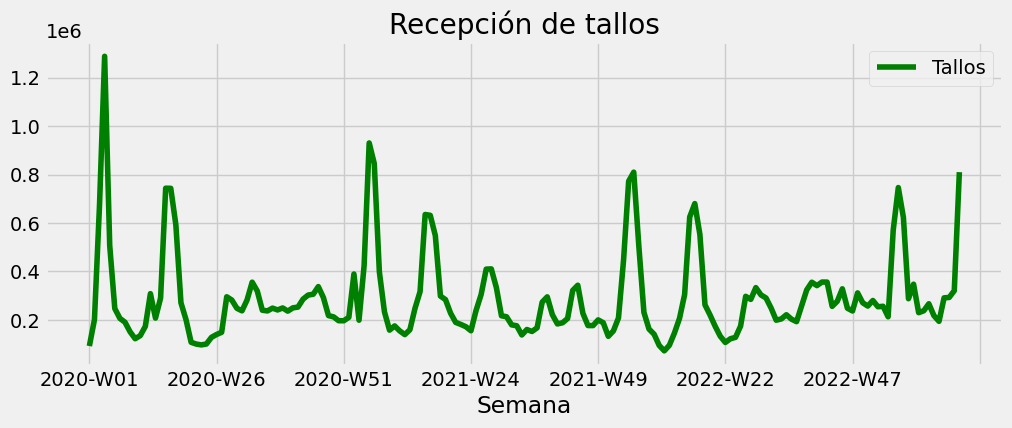

In [41]:
df_recepcion.plot(kind='line',y='Tallos',color='green')
plt.title("Recepción de tallos")
plt.show()


In [43]:
df_recepcion.tail()

,Tallos
Semana,
2023-W12,193955
2023-W13,291043
2023-W14,292633
2023-W15,320622
2023-W16,810080


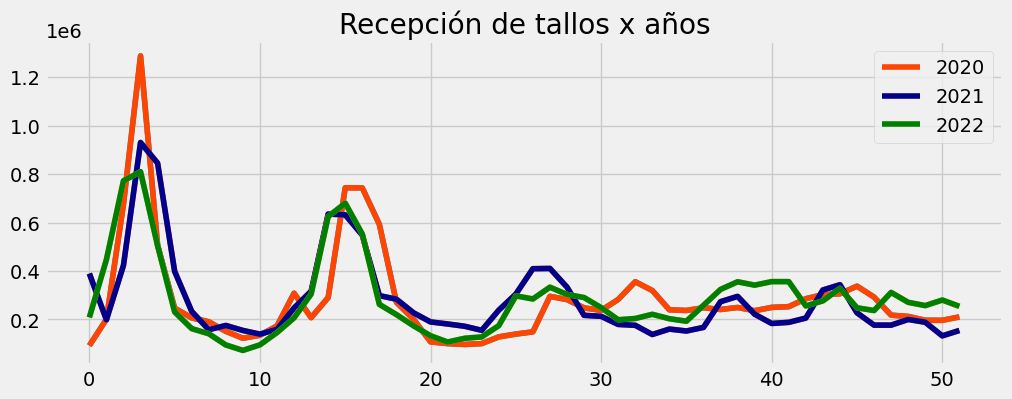

In [44]:
df_rec_2020 = df_recepcion.loc['2020-W01':'2020-W53']
plt.plot(df_rec_2020.values)
plt.plot(df_rec_2020.values, color='orangered', label='2020')

df_rec_2021 = df_recepcion.loc['2021-W01':'2021-W53']
plt.plot(df_rec_2021.values)
plt.plot(df_rec_2021.values, color='darkblue',label='2021' )


df_rec_2022 = df_recepcion.loc['2022-W01':'2022-W53']
plt.plot(df_rec_2022.values)
plt.plot(df_rec_2022.values, color='green' ,label='2022')

#df_rec_2023 = df_recepcion.loc['2023-W01':'2023-W53']
#plt.plot(df_rec_2023.values)
#plt.plot(df_rec_2023.values, color='salmon',label='2023')

plt.title("Recepción de tallos x años")
plt.legend()

In [53]:
df_recepcion

,Tallos
Semana,
2020-W01,91939
2020-W02,200892
2020-W03,676003
2020-W04,1288302
2020-W05,507192
...,...
2023-W12,193955
2023-W13,291043
2023-W14,292633


EStadistica de balanceo, permite trazar la media movil y la desviacion estandar movil, si la serire de tempo es estacionaria

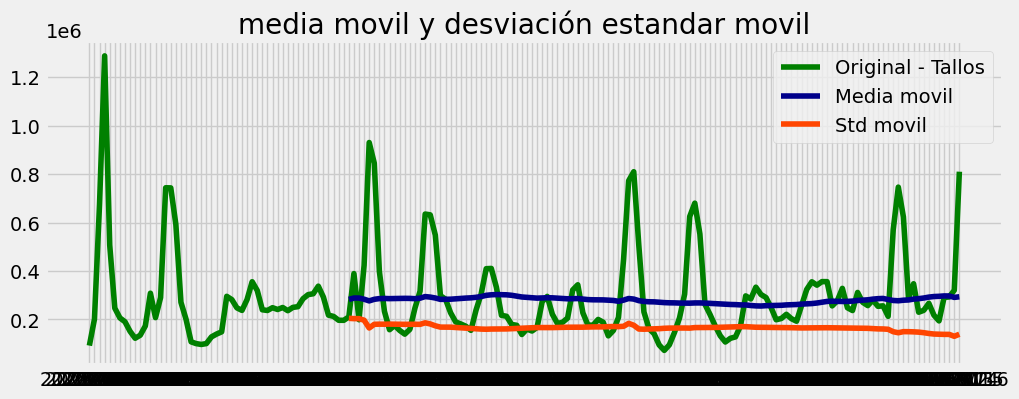

In [46]:
#https://towardsdatascience.com/machine-learning-part-19-time-series-and-autoregressive-integrated-moving-average-model-arima-c1005347b0d7
rolling_mean = df_recepcion.rolling(window = 52).mean()
rolling_std = df_recepcion.rolling(window = 52).std()
plt.plot(df_recepcion, color = 'green', label = 'Original - Tallos')
plt.plot(rolling_mean, color = 'darkblue', label = 'Media movil')
plt.plot(rolling_std, color = 'orangered', label = 'Std movil')
plt.legend(loc = 'best')
plt.title('media movil y desviación estandar movil')
plt.show()

In [47]:
result = adfuller(df_recepcion['Tallos'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))


ADF Statistic: -2.6600337780044208
p-value: 0.08121315073191326
Critical Values:
	1%: -3.472161410886292
	5%: -2.8798954259680936
	10%: -2.5765565828092245


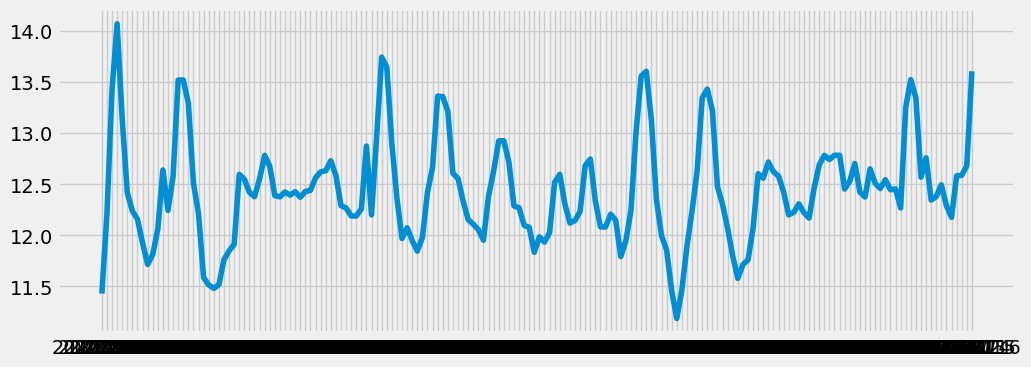

In [48]:
#Logaritmo de los tallos permite ver lasi la media aumenta en el tiempo
df_log = np.log(df_recepcion)
plt.plot(df_log)

Descomposición de series de tiempo: Esta técnica se utiliza para descomponer una serie de tiempo en sus componentes de tendencia, estacionalidad y residuos. Si los componentes de tendencia y estacionalidad son significativos, entonces se puede concluir que la serie de tiempo tiene tanto tendencia como estacionalidad.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse

In [54]:
data = df_recepcion['Tallos']
result = seasonal_decompose(data, model='additive', period=52) #teniendo en cuenta que la ifnormacion origalmetne esta dada por semanas

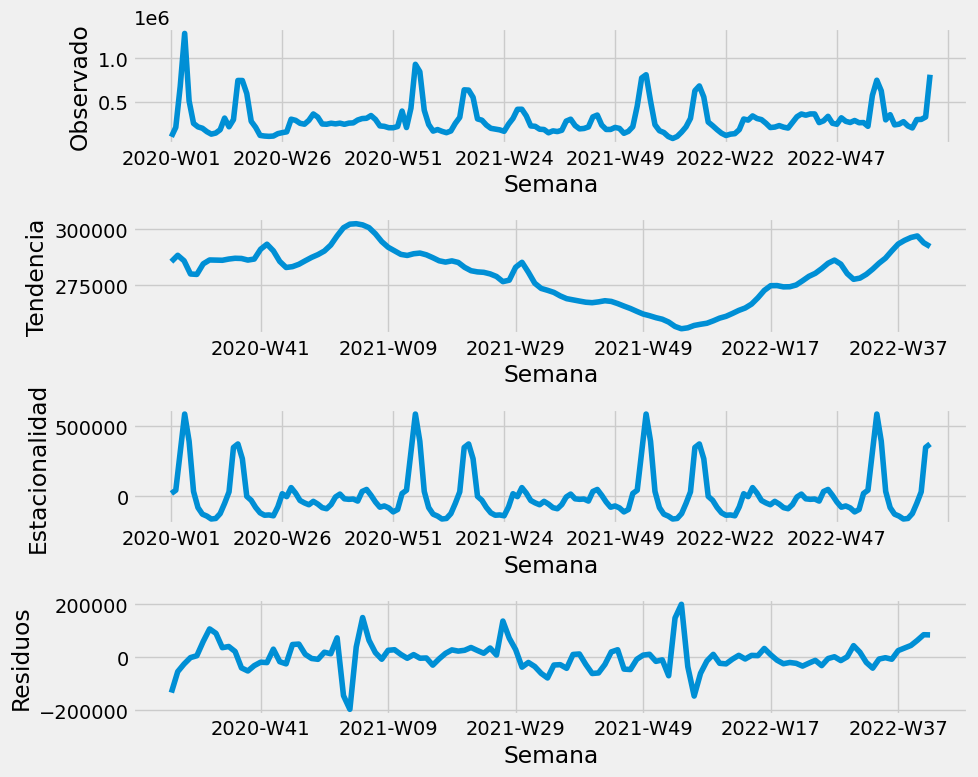

In [55]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observado')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Tendencia')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Estacionalidad')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residuos')
plt.tight_layout()
plt.show()

In [56]:
# Calcular las métricas de evaluación
mse = ((data - result.seasonal - result.trend - result.resid) ** 2).mean()
#rmse = rmse(data, result.seasonal + result.trend + result.resid)
r2 = 1 - (result.resid.var() / data.var())

In [57]:
print('MSE: ', mse)
#print('RMSE: ', rmse)
print('R-squared: ', r2)

MSE:  2.1519275964861297e-22
R-squared:  0.9123969445285101


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


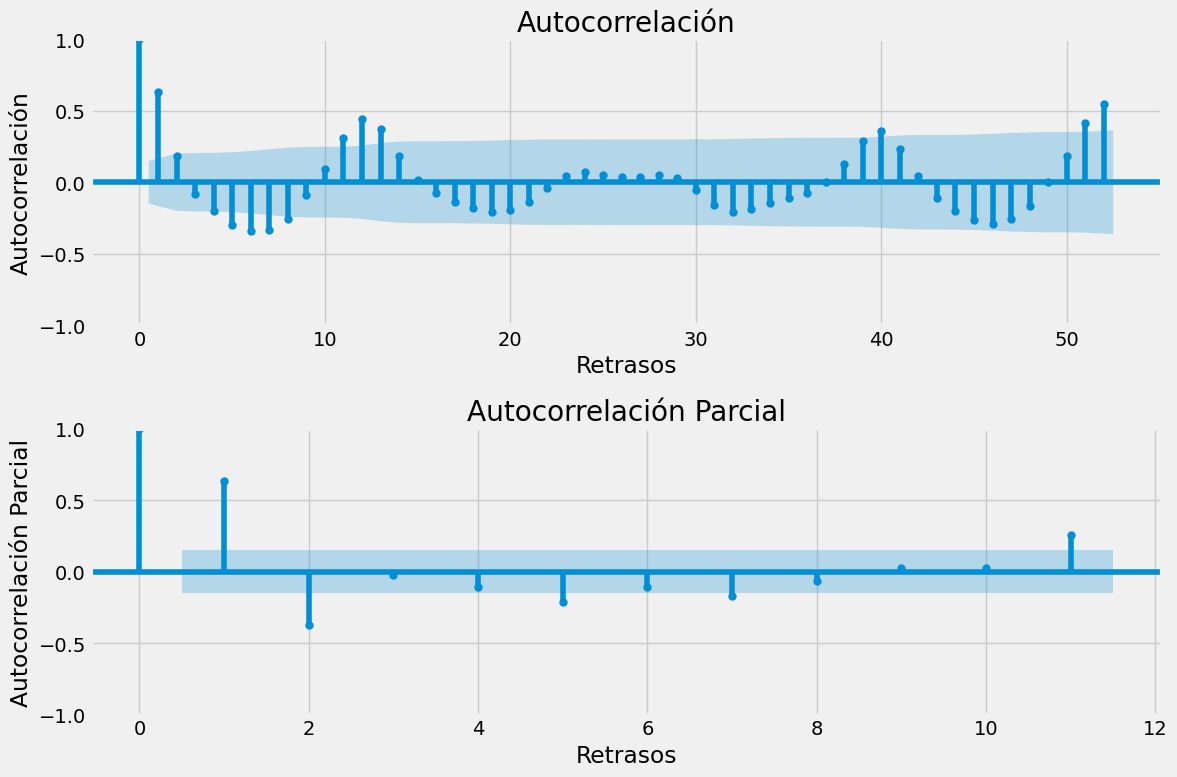

In [58]:
# Generar los gráficos de autocorrelación y autocorrelación parcial
fig, ax = plt.subplots(nrows=2, figsize=(12, 8))
sm.graphics.tsa.plot_acf(data, lags=52, ax=ax[0])
ax[0].set_xlabel('Retrasos')
ax[0].set_ylabel('Autocorrelación')
ax[0].set_title('Autocorrelación')

sm.graphics.tsa.plot_pacf(data,lags=11, ax=ax[1])
ax[1].set_xlabel('Retrasos')
ax[1].set_ylabel('Autocorrelación Parcial')
ax[1].set_title('Autocorrelación Parcial')
plt.tight_layout()
plt.show()

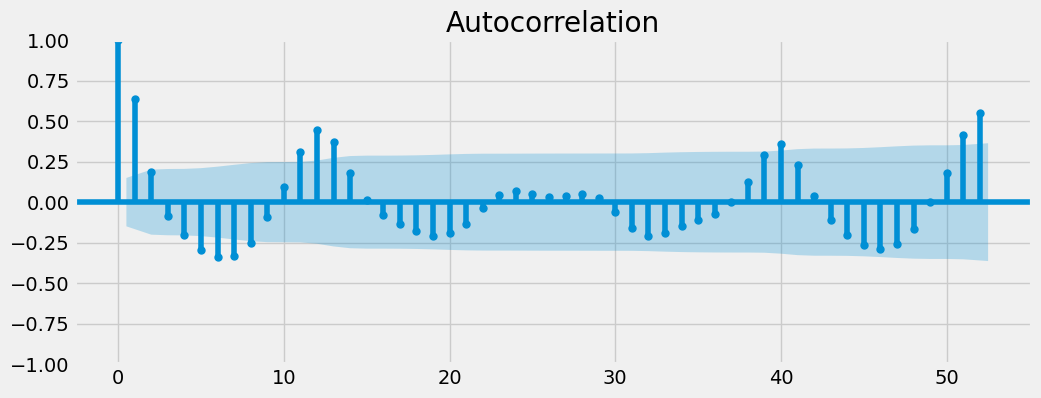

In [59]:
# Crear gráfico de autocorrelación- ¿
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_recepcion["Tallos"], lags=52)
plt.show()

------------------- ----------------------------------- ---------------------- ------------------------- -------------

Almacenamos el DF de recepción para usar mas tarde en el modelado

In [62]:
df_recepcion_traint=df_recepcion.loc['2020-W01':'2022-W53'] #
df_recepcion_test=df_recepcion.loc['2023-W01':] #dejamos el 2023 para probar el modelo

In [63]:
df_recepcion_traint.to_csv('df_recepcion_traint.csv',sep= ";", header=True, index=True)
df_recepcion_test.to_csv('df_recepcion_test.csv',sep= ";", header=True, index=True)

Determinar el valor de d: El primer paso es determinar el número de diferencias necesarias para convertir la serie de tiempo en estacionaria. Esto se puede hacer mediante la inspección visual de la serie de tiempo o mediante la prueba de Dickey-Fuller. Si se necesita una diferencia, d=1; si se necesitan dos diferencias, d=2, y así sucesivamente.

Identificar el valor de q: La identificación del valor de q se puede hacer observando el primer punto en el gráfico del autocorrelaciograma que cruza la línea de confianza superior. Este punto indica el valor de q, que es el retraso máximo significativo en el cual la autocorrelación es significativamente diferente de cero. q=10

Identificar el valor de p: La identificación del valor de p se puede hacer observando el primer punto en el gráfico del autocorrelaciograma parcial que cruza la línea de confianza superior. Este punto indica el valor de p, que es el retraso máximo significativo en el cual la autocorrelación parcial es significativamente diferente de cero.

ARIMAX

Se deben aplicar tecnicas de tranformacion de la serie (resta de la mdia movil)
#dejo esta parte como guia en caso de que se requiera hacer diferencición de la serie no sea estacionaria, la cantidad de diferenciaciones es lo que da origen a parametro d, para los tallos no hicimos ninguna diferenciación d=0


In [ ]:
'''df_diff = y.diff(52).dropna()'''

'df_diff = y.diff(52).dropna()'

In [ ]:
#df_diff

In [ ]:
'''df_diff.plot(kind='line',y='Tallos',color='green')
plt.title("Recepción de tallos- Serie transformada")
plt.show()'''

'df_diff.plot(kind=\'line\',y=\'Tallos\',color=\'green\')\nplt.title("Recepción de tallos- Serie transformada")\nplt.show()'

In [ ]:
#Verificar la estacionariedad - serie transformada
'''from statsmodels.tsa.stattools import adfuller

result = adfuller(df_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))'''
    


"from statsmodels.tsa.stattools import adfuller\n\nresult = adfuller(df_diff)\nprint('ADF Statistic: %f' % result[0])\nprint('p-value: %f' % result[1])\nprint('Critical Values:')\nfor key, value in result[4].items():\n    print('\t%s: %.3f' % (key, value))"

In [ ]:
#df_diff

--------------------- ----------------------- ---------------------              ----------------------------------------- ---------